In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('~/Downloads/IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Explore the dataset
data.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

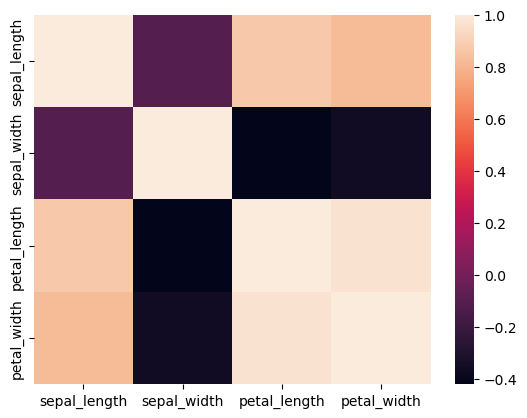

In [92]:
# check for correlation
corr = data.drop(columns='species').corr()
print(corr)
sns.heatmap(corr)

## Model Building

In [93]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [58]:
X = data.drop(columns = 'species')
Y = data.species

In [59]:
# convert our target to numurical value
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [60]:
X_train,X_test,Y_train,Y_test = split(X,Y,test_size = 0.20,random_state = 42)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [62]:
logreg = LinearRegression()

In [63]:
logreg.fit(X_train,Y_train)

LinearRegression()

In [64]:
y_pred = logreg.predict(X_test)

In [65]:
y_pred_binary = [round(pred) for pred in y_pred]

In [66]:
accuracy = accuracy_score(Y_test, y_pred_binary)

In [71]:
print("The Accuracy score for Linear regression  is :", accuracy)

The Accuracy score for Linear regression  is : 1.0


In [68]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [80]:
y_p = forest.predict(X_test)

In [81]:
acc_score = accuracy_score(Y_test, y_p)

In [82]:
print("The Accuracy score for Random Forest Classifier  is :", acc_score)

The Accuracy score for Random Forest Classifier  is : 1.0


In [83]:
# print classification report
# classification report for linear model
print(classification_report(Y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [84]:
# classification report for randome forest model
print(classification_report(Y_test,forest.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

